In [3]:
from pandas import read_csv, DataFrame, concat
from matplotlib.pyplot import show, suptitle, subplots_adjust, plot, subplots, legend
from matplotlib.pyplot import figure, plot, title, xlabel, ylabel, text, grid, xticks, tight_layout, style
from seaborn import kdeplot, heatmap, boxplot, countplot, histplot, scatterplot
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
from pickle import dump


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
df = read_csv('Music Recommendation System using Spotify Dataset.csv')

In [5]:
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10.0,0.665,-20.096,1.0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4.0,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7.0,0.160,-12.441,1.0,Clancy Lowered the Boom,5.0,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3.0,0.101,-14.850,1.0,Gati Bali,5.0,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5.0,0.381,-9.316,1.0,Danny Boy,3.0,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3.0,0.229,-10.096,1.0,When Irish Eyes Are Smiling,2.0,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155623,0.1870,1930,0.924,['Andrea Wolper'],0.449,288307,0.214,0,7DhdmSnOql2WUtyibX0vPQ,0.000004,4.0,0.154,-10.382,0.0,Night Time Was My Mother,0.0,1930,0.0358,105.304
155624,0.9280,1930,0.923,['Raquel Meller'],0.624,162633,0.441,0,7DjhLJytwL6jpv899aIZSF,0.353000,10.0,0.234,-4.810,1.0,Tengo Miedo Torero,0.0,1/1/1930,0.0357,125.944
155625,0.3810,1930,0.122,['Cellular Project'],0.411,295729,0.660,0,7DmsrKo81sB9mE4wqcHKG1,0.416000,2.0,0.390,-6.923,0.0,Glow Reefer Glow,0.0,1930,0.0513,116.356
155626,0.9540,1930,0.976,['Αλέξης Ζούμπας'],0.565,229080,0.532,0,7EVRpnW3NbtIxX1vGhKjtU,0.001580,3.0,0.146,-8.900,1.0,Θειακό συρτό Γιαννιώτικο,0.0,1/1/1930,0.0531,104.565


In [6]:
df.shape

(155628, 19)

In [7]:
df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155628 entries, 0 to 155627
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           155628 non-null  float64
 1   year              155628 non-null  int64  
 2   acousticness      155628 non-null  float64
 3   artists           155628 non-null  object 
 4   danceability      155628 non-null  float64
 5   duration_ms       155628 non-null  int64  
 6   energy            155628 non-null  float64
 7   explicit          155628 non-null  int64  
 8   id                155628 non-null  object 
 9   instrumentalness  155627 non-null  float64
 10  key               155627 non-null  float64
 11  liveness          155627 non-null  float64
 12  loudness          155627 non-null  float64
 13  mode              155627 non-null  float64
 14  name              155627 non-null  object 
 15  popularity        155627 non-null  float64
 16  release_date      15

In [9]:
df.isnull().sum()

,0
valence,0
year,0
acousticness,0
artists,0
danceability,0
duration_ms,0
energy,0
explicit,0
id,0
instrumentalness,1


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
valence,155628.0,0.529451,0.263062,0.0,0.3180,0.541000,0.74800,1.000
year,155628.0,1976.244121,26.174668,1921.0,1955.0000,1977.000000,1999.00000,2020.000
acousticness,155628.0,0.505038,0.376741,0.0,0.1030,0.522000,0.89725,0.996
danceability,155628.0,0.538349,0.176040,0.0,0.4160,0.549000,0.66900,0.988
duration_ms,155628.0,230405.495746,124141.007582,5108.0,169811.2500,207028.000000,261854.25000,5403500.000
energy,155628.0,0.480066,0.267510,0.0,0.2530,0.467000,0.70100,1.000
explicit,155628.0,0.085132,0.279080,0.0,0.0000,0.000000,0.00000,1.000
instrumentalness,155627.0,0.168060,0.314518,0.0,0.0000,0.000218,0.10400,1.000
key,155627.0,5.202645,3.513649,0.0,2.0000,5.000000,8.00000,11.000
liveness,155627.0,0.205128,0.173310,0.0,0.0988,0.136000,0.26100,0.999


In [12]:
df.select_dtypes(include='object').describe()

,artists,id,name,release_date
count,155628,155628,155627,155627
unique,31694,155628,122799,10761
top,['Эрнест Хемингуэй'],7EWUlxA8PldUausl,White Christmas,1945
freq,1145,1,70,1290


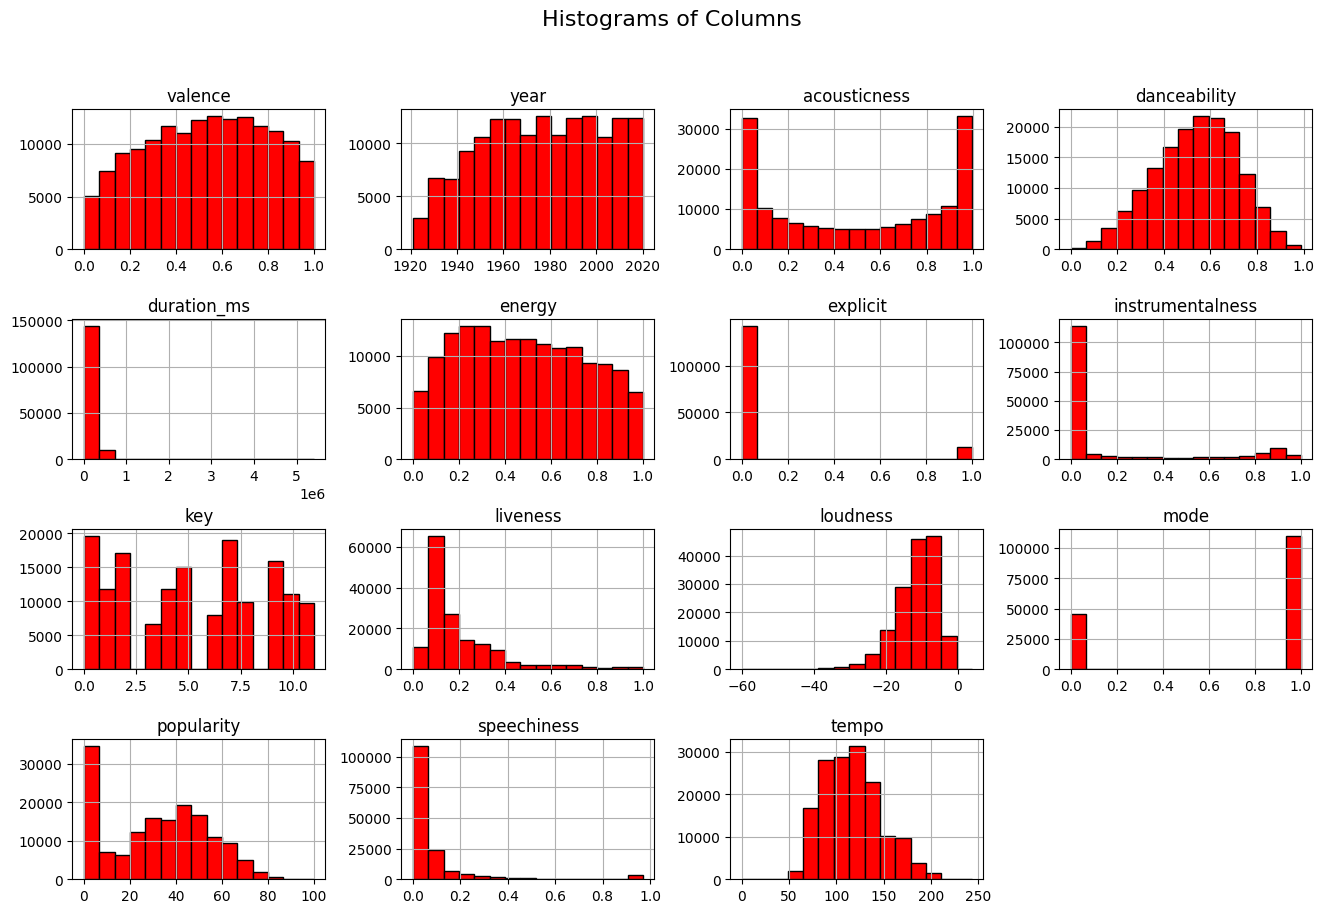

In [13]:
df.hist(bins=15, figsize=(16, 10), color='red', edgecolor='black')

# Set titles and labels for each subplot
suptitle('Histograms of Columns', fontsize=16)
subplots_adjust(hspace=0.5)  # Add space between plots
show()

In [14]:
df["release_date"].value_counts()

,count
release_date,
1945,1290
1949,1138
1926,1099
1935,1078
1948,1011
...,...
2/6/2018,1
2/11/2019,1
10/1/2019,1


In [15]:
df['year'].value_counts()

,count
year,
2018,1903
2020,1829
2011,1817
2010,1816
2001,1805
...,...
1925,278
1924,236
1923,185


In [16]:
df['explicit'].value_counts()

,count
explicit,
0,142379
1,13249


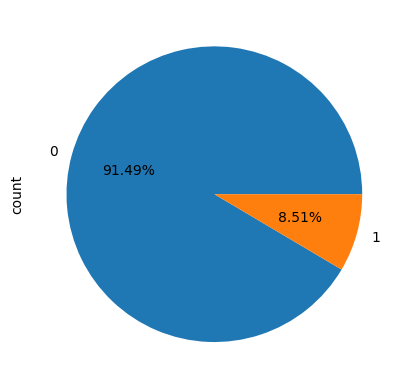

In [17]:
df['explicit'].value_counts().plot.pie(autopct='%0.2f%%')
show()

In [18]:
top20_songs=df['name'].value_counts().sort_values(ascending=False)[:20]
top20_songs

,count
name,
White Christmas,70
Winter Wonderland,58
Summertime,49
Jingle Bells,47
Overture,44
Silent Night,43
Home,39
The Christmas Song,33
You,32


In [19]:
nameDict = top20_songs.to_dict()
nameDict

{'White Christmas': 70,
 'Winter Wonderland': 58,
 'Summertime': 49,
 'Jingle Bells': 47,
 'Overture': 44,
 'Silent Night': 43,
 'Home': 39,
 'The Christmas Song': 33,
 'You': 32,
 'Stay': 31,
 'Hold On': 30,
 'Sleigh Ride': 30,
 'Forever': 30,
 'Angel': 29,
 'Stardust': 29,
 'Silver Bells': 29,
 'The Way You Look Tonight': 28,
 'I Love You': 28,
 'Autumn Leaves': 27,
 'Have Yourself a Merry Little Christmas': 26}

In [20]:
song_names = [f'{i}' for i in top20_songs.keys()]
song_names

['White Christmas',
 'Winter Wonderland',
 'Summertime',
 'Jingle Bells',
 'Overture',
 'Silent Night',
 'Home',
 'The Christmas Song',
 'You',
 'Stay',
 'Hold On',
 'Sleigh Ride',
 'Forever',
 'Angel',
 'Stardust',
 'Silver Bells',
 'The Way You Look Tonight',
 'I Love You',
 'Autumn Leaves',
 'Have Yourself a Merry Little Christmas']

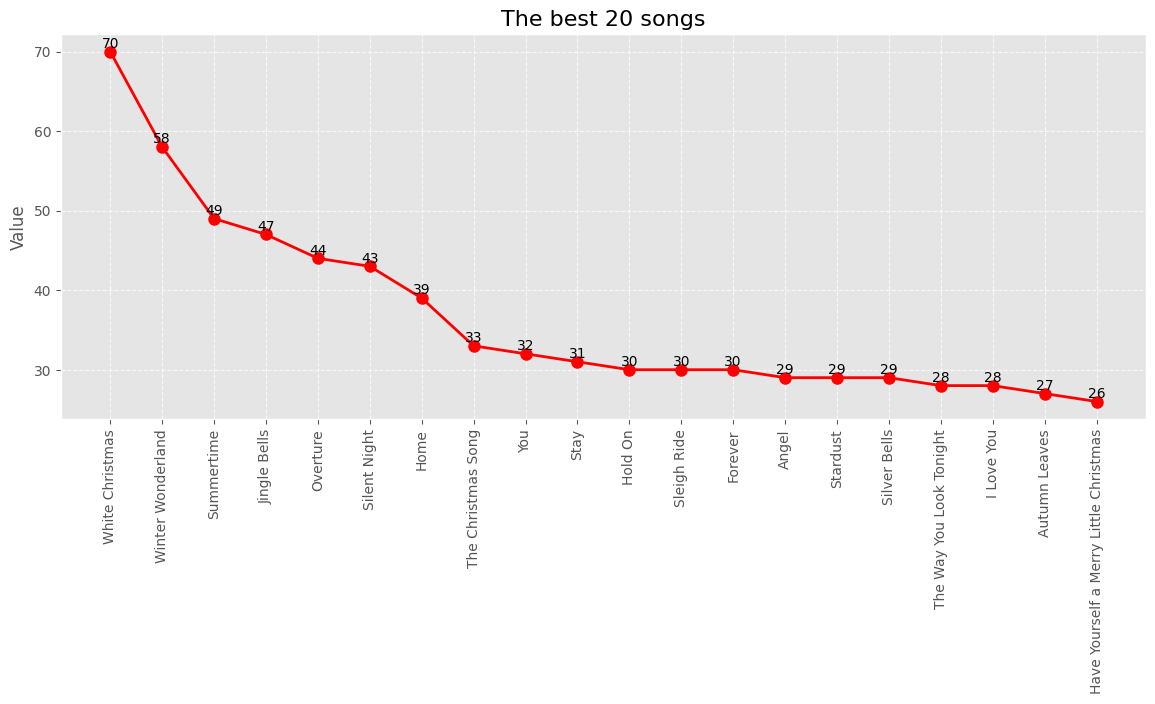

In [21]:
style.use('ggplot')
figure(figsize=(14, 5))

plot(top20_songs, marker='o', color='red', linestyle='-', linewidth=2, markersize=8)
xticks(ticks=range(len(song_names)), labels=song_names, rotation=90, fontsize=10)
title('The best 20 songs', fontsize=16)
ylabel('Value', fontsize=12)

for i, value in enumerate(top20_songs):
    text(i, value + 0.5, str(round(value, 2)), ha='center', fontsize=10, color='black')

grid(True, linestyle='--', alpha=0.7)
show()

In [22]:
top20MeanPopularity=[df[df['name']==i]['popularity'].mean() for i in list(top20_songs.keys())]
top20MeanPopularity.sort()
top20MeanPopularity

[np.float64(10.909090909090908),
 np.float64(24.03448275862069),
 np.float64(27.0),
 np.float64(27.014285714285716),
 np.float64(27.035714285714285),
 np.float64(29.925925925925927),
 np.float64(30.142857142857142),
 np.float64(30.727272727272727),
 np.float64(31.120689655172413),
 np.float64(31.20408163265306),
 np.float64(31.837209302325583),
 np.float64(32.03448275862069),
 np.float64(35.7),
 np.float64(43.65384615384615),
 np.float64(46.3448275862069),
 np.float64(47.8),
 np.float64(48.40625),
 np.float64(48.43333333333333),
 np.float64(48.666666666666664),
 np.float64(49.87096774193548)]

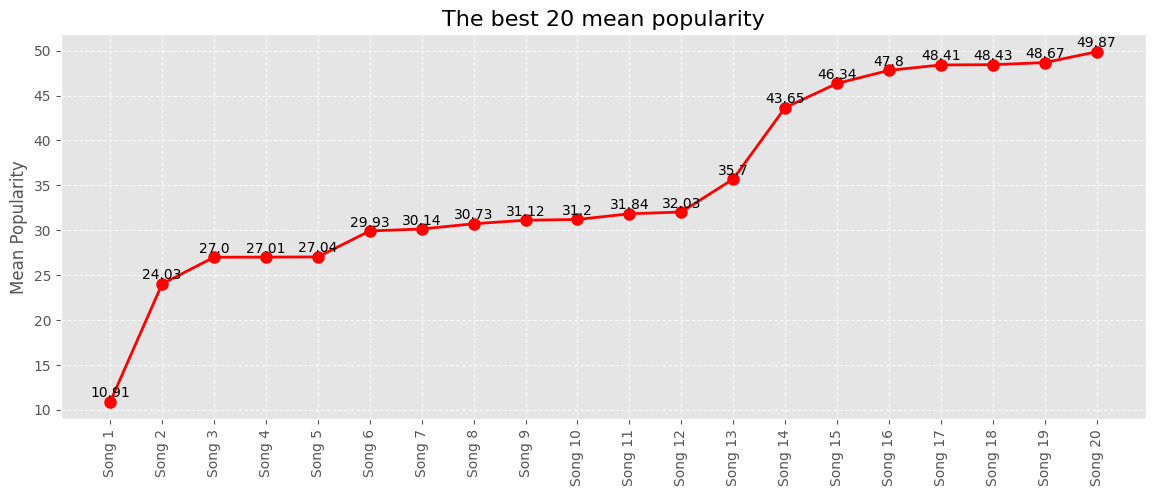

In [24]:
song_names = [f'Song {i+1}' for i in range(len(top20MeanPopularity))]

style.use('ggplot')
figure(figsize=(14, 5))

plot(top20MeanPopularity, marker='o', color='red', linestyle='-', linewidth=2, markersize=8)
xticks(ticks=range(len(song_names)), labels=song_names, rotation=90, fontsize=10)
title('The best 20 mean popularity', fontsize=16)
ylabel('Mean Popularity', fontsize=12)
for i, value in enumerate(top20MeanPopularity):
    text(i, value + 0.5, str(round(value, 2)), ha='center', fontsize=10, color='black')

grid(True, linestyle='--', alpha=0.7)
show()

In [25]:
top20_artist = df['artists'].value_counts().sort_values(ascending=False)[:20]
top20_artist

,count
artists,
['Эрнест Хемингуэй'],1145
['Эрих Мария Ремарк'],1007
['Francisco Canaro'],937
['Ignacio Corsini'],624
['Frank Sinatra'],603
['Elvis Presley'],458
"['Francisco Canaro', 'Charlo']",451
['Johnny Cash'],444
['Bob Dylan'],433


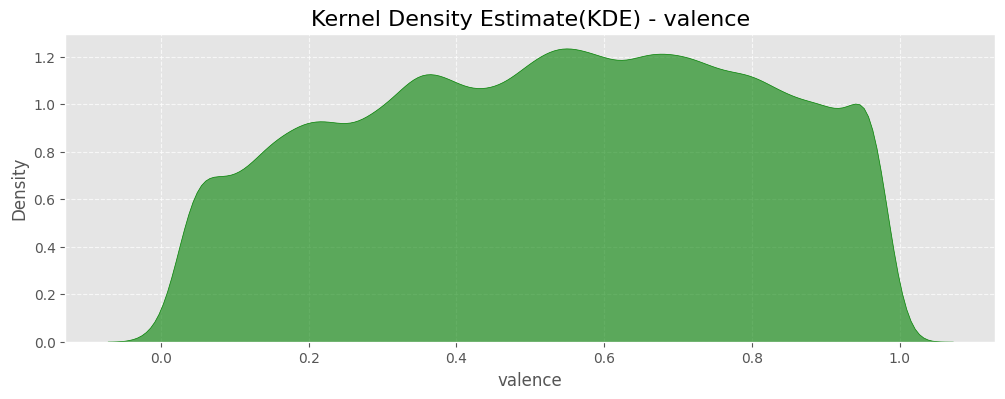

In [26]:
figure(figsize=(12,	4))
kdeplot(df['valence'], fill=True,	color='green', alpha=0.6)
title('Kernel Density Estimate(KDE) - valence',	fontsize=16)
xlabel('valence',	fontsize=12)
ylabel('Density', fontsize=12)
grid(True, linestyle='--', alpha=0.7)
show()

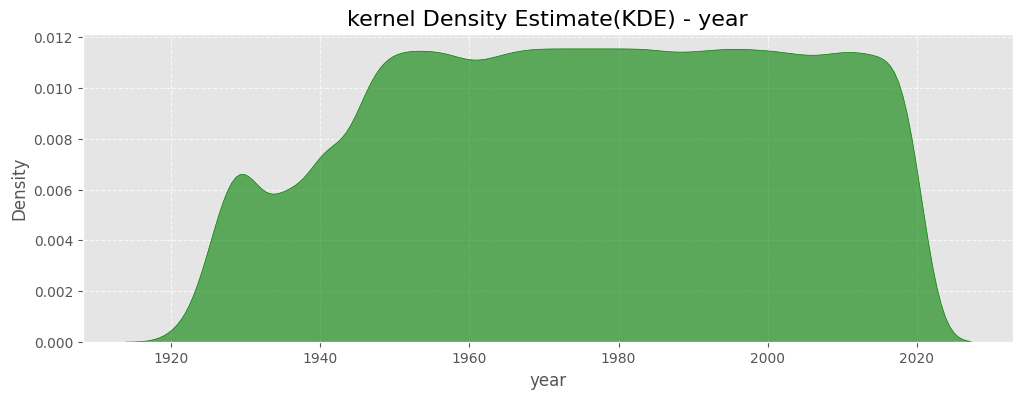

In [27]:
figure(figsize=(12, 4))
kdeplot(df['year'], fill = True, color = 'green', alpha = 0.6)
title('kernel Density Estimate(KDE) - year', fontsize=16)
xlabel('year', fontsize = 12)
ylabel('Density', fontsize = 12)
grid(True, linestyle = '--', alpha = 0.7)
show()

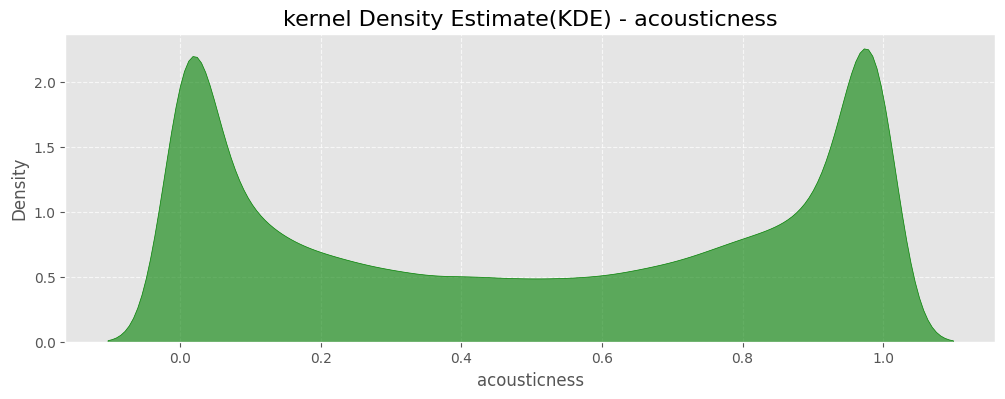

In [28]:
figure(figsize=(12, 4))
kdeplot(df['acousticness'], fill = True, color = 'green', alpha = 0.6)
title('kernel Density Estimate(KDE) - acousticness', fontsize=16)
xlabel('acousticness', fontsize = 12)
ylabel('Density', fontsize = 12)
grid(True, linestyle = '--', alpha = 0.7)
show()

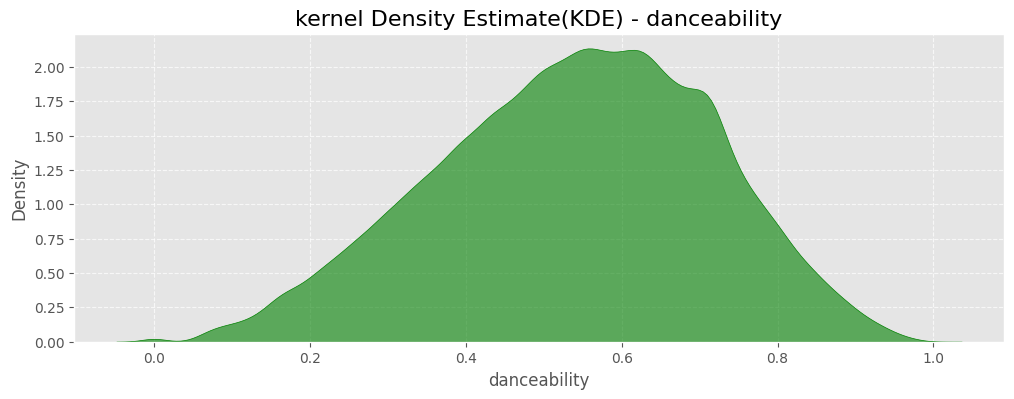

In [29]:
figure(figsize=(12, 4))
kdeplot(df['danceability'], fill = True, color = 'green', alpha = 0.6)
title('kernel Density Estimate(KDE) - danceability', fontsize=16)
xlabel('danceability', fontsize = 12)
ylabel('Density', fontsize = 12)
grid(True, linestyle = '--', alpha = 0.7)
show()

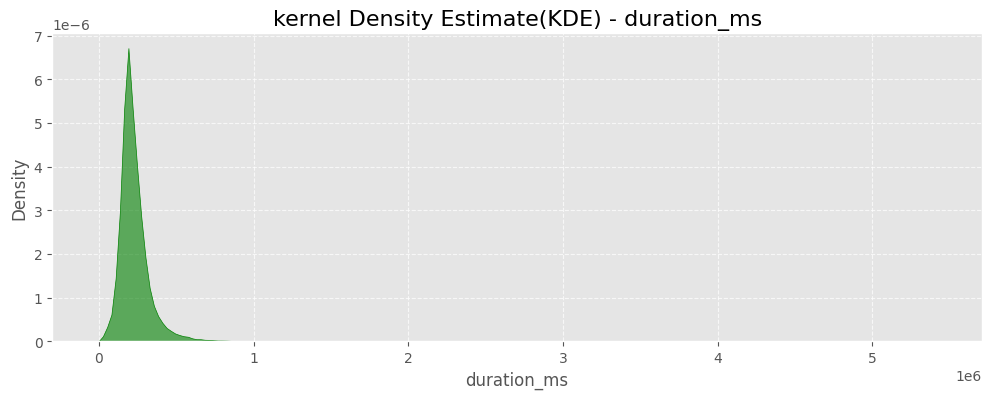

In [30]:
figure(figsize=(12, 4))
kdeplot(df['duration_ms'], fill = True, color = 'green', alpha = 0.6)
title('kernel Density Estimate(KDE) - duration_ms', fontsize=16)
xlabel('duration_ms', fontsize = 12)
ylabel('Density', fontsize = 12)
grid(True, linestyle = '--', alpha = 0.7)
show()

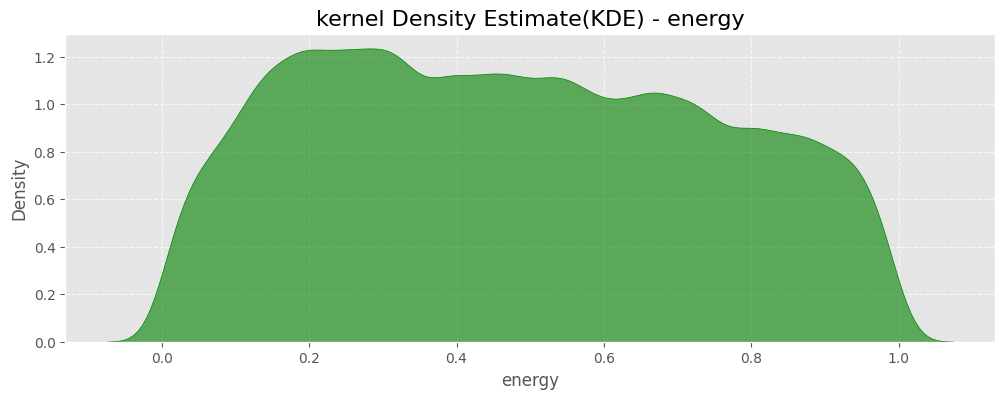

In [31]:
figure(figsize=(12, 4))
kdeplot(df['energy'], fill = True, color = 'green', alpha = 0.6)
title('kernel Density Estimate(KDE) - energy', fontsize=16)
xlabel('energy', fontsize = 12)
ylabel('Density', fontsize = 12)
grid(True, linestyle = '--', alpha = 0.7)
show()

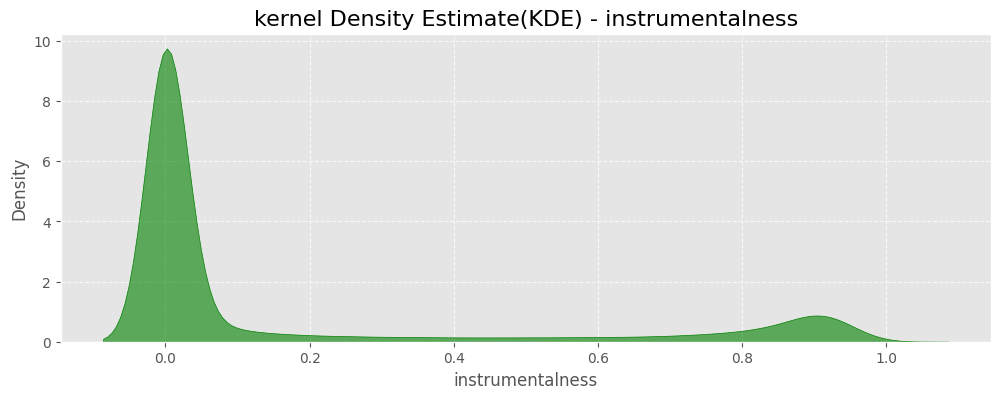

In [32]:
figure(figsize=(12, 4))
kdeplot(df['instrumentalness'], fill = True, color = 'green', alpha = 0.6)
title('kernel Density Estimate(KDE) - instrumentalness', fontsize=16)
xlabel('instrumentalness', fontsize = 12)
ylabel('Density', fontsize = 12)
grid(True, linestyle = '--', alpha = 0.7)
show()


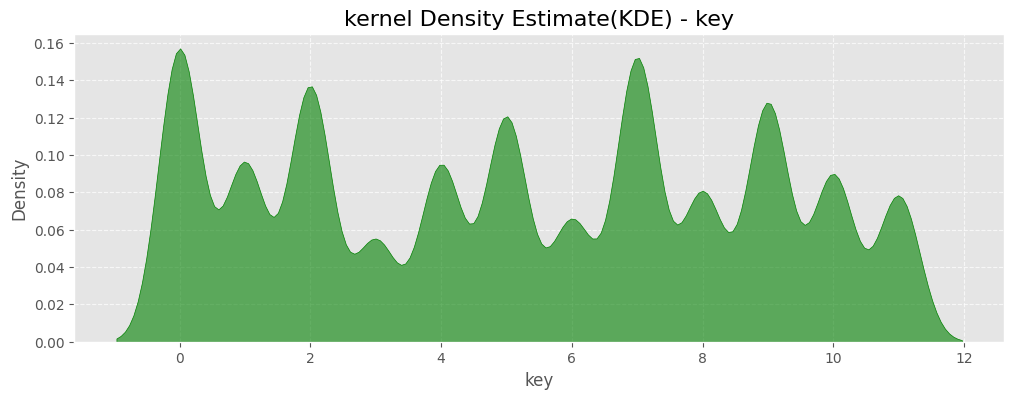

In [33]:
figure(figsize=(12, 4))
kdeplot(df['key'], fill = True, color = 'green', alpha = 0.6)
title('kernel Density Estimate(KDE) - key', fontsize=16)
xlabel('key', fontsize = 12)
ylabel('Density', fontsize = 12)
grid(True, linestyle = '--', alpha = 0.7)
show()

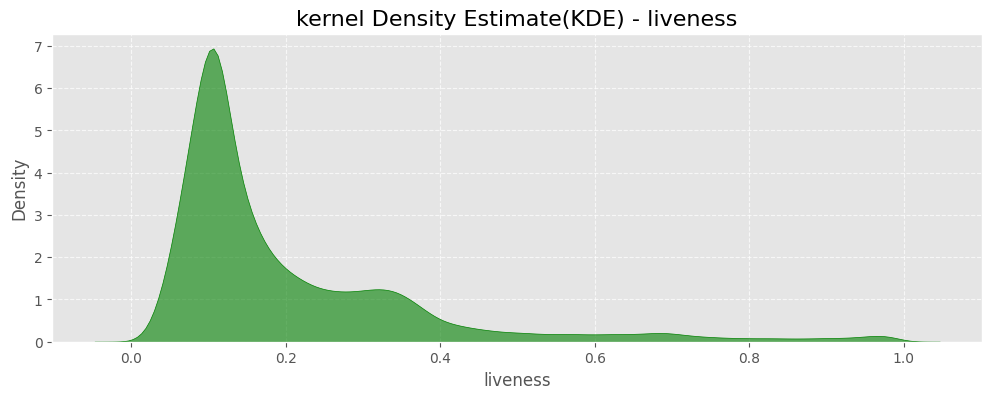

In [34]:
figure(figsize=(12, 4))
kdeplot(df['liveness'], fill = True, color = 'green', alpha = 0.6)
title('kernel Density Estimate(KDE) - liveness', fontsize=16)
xlabel('liveness', fontsize = 12)
ylabel('Density', fontsize = 12)
grid(True, linestyle = '--', alpha = 0.7)
show()


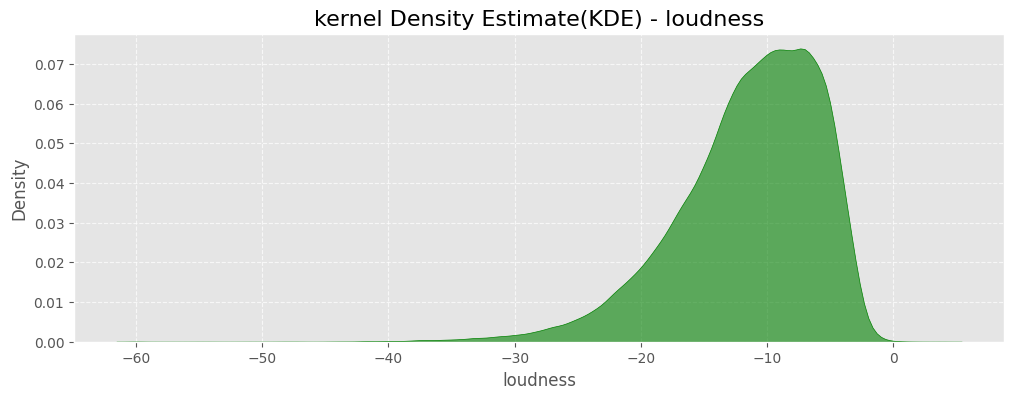

In [35]:
figure(figsize=(12, 4))
kdeplot(df['loudness'], fill = True, color = 'green', alpha = 0.6)
title('kernel Density Estimate(KDE) - loudness', fontsize=16)
xlabel('loudness', fontsize = 12)
ylabel('Density', fontsize = 12)
grid(True, linestyle = '--', alpha = 0.7)
show()

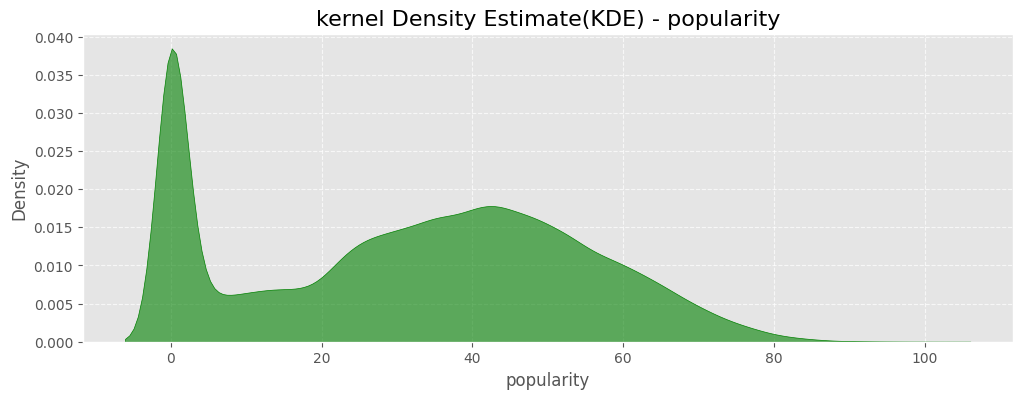

In [36]:
figure(figsize=(12, 4))
kdeplot(df['popularity'], fill = True, color = 'green', alpha = 0.6)
title('kernel Density Estimate(KDE) - popularity', fontsize=16)
xlabel('popularity', fontsize = 12)
ylabel('Density', fontsize = 12)
grid(True, linestyle = '--', alpha = 0.7)
show()

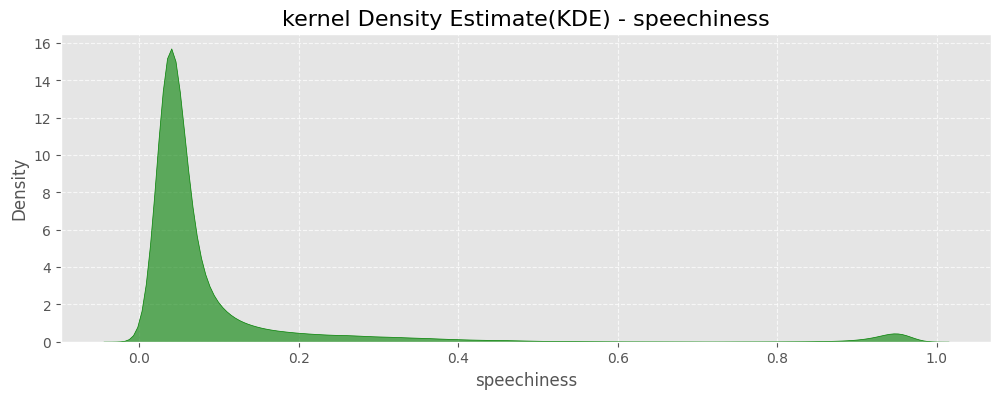

In [37]:
figure(figsize=(12, 4))
kdeplot(df['speechiness'], fill = True, color = 'green', alpha = 0.6)
title('kernel Density Estimate(KDE) - speechiness', fontsize=16)
xlabel('speechiness', fontsize = 12)
ylabel('Density', fontsize = 12)
grid(True, linestyle = '--', alpha = 0.7)
show()

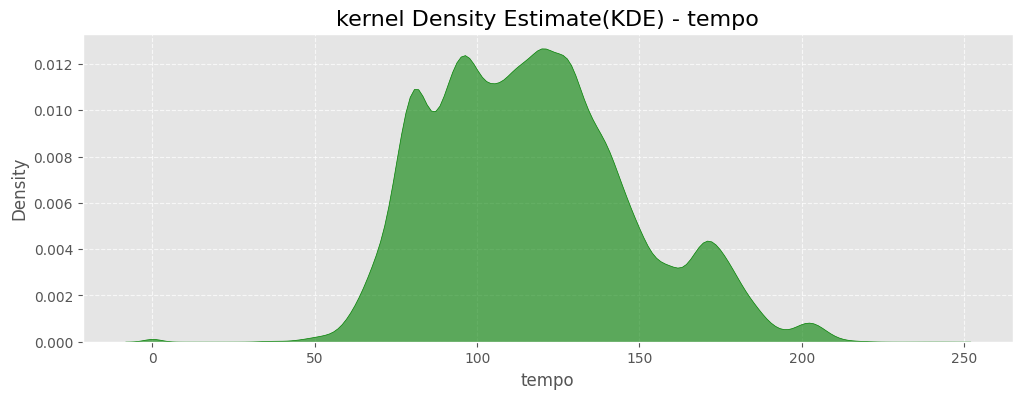

In [38]:
figure(figsize=(12, 4))
kdeplot(df['tempo'], fill = True, color = 'green', alpha = 0.6)
title('kernel Density Estimate(KDE) - tempo', fontsize=16)
xlabel('tempo', fontsize = 12)
ylabel('Density', fontsize = 12)
grid(True, linestyle = '--', alpha = 0.7)
show()

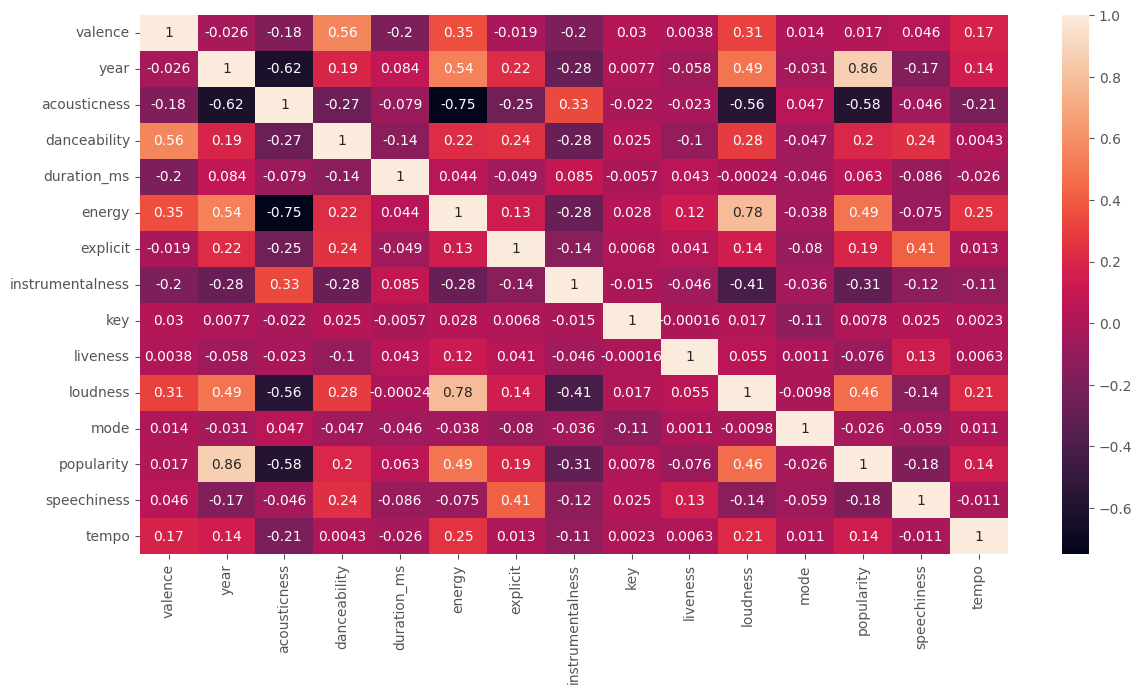

In [39]:
figure(figsize=(14,	7))
heatmap(df.select_dtypes(include='number').corr(), annot=True)
show()

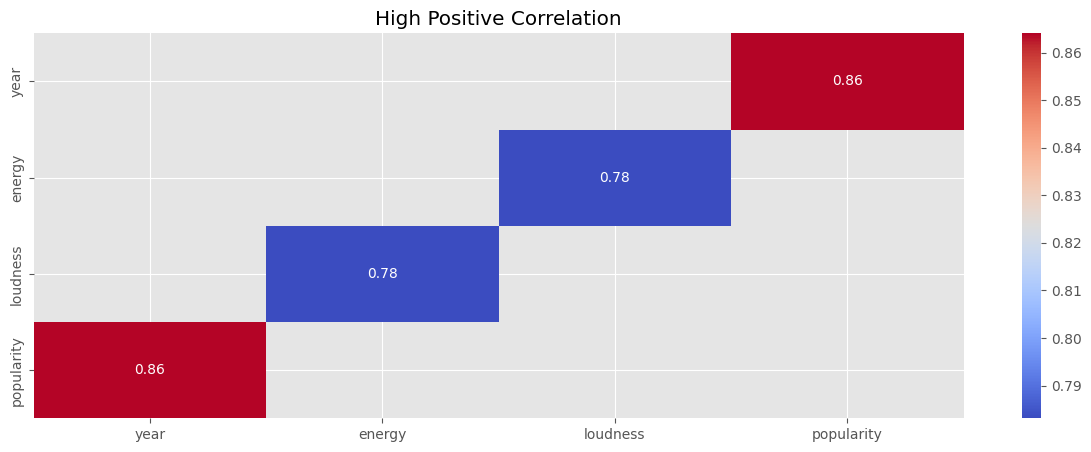

In [40]:
def get_high_corr(df, threshold):
    corr = df.select_dtypes('number').corr()
    high_corr = corr[(corr >= threshold) & (corr != 1.000)]
    high_corr = high_corr.dropna(how='all', axis=1).dropna(how='all', axis=0)
    return high_corr

high_corr = get_high_corr(df, 0.7)

figure(figsize=(15, 5))
plot = heatmap(high_corr, annot=True, cmap='coolwarm')
plot.set_title('High Positive Correlation')
show()

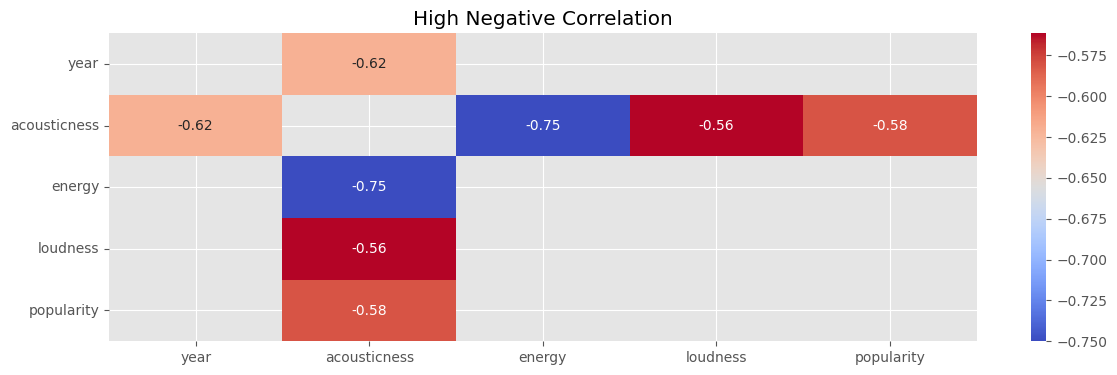

In [41]:
def get_high_corr(df, threshold):
    corr = df.select_dtypes('number').corr()
    high_corr = corr[(corr <= threshold) & (corr != 1.000)]
    high_corr = high_corr.dropna(how='all', axis=1).dropna(how='all', axis=0)
    return high_corr


high_corr = get_high_corr(df, -0.5)


figure(figsize=(14, 4))
plot = heatmap(high_corr, annot=True, cmap='coolwarm')
plot.set_title('High Negative Correlation')
show()


In [42]:
def scatter(df, x, y, title):
    figure(figsize=(14, 4))
    ax = scatterplot(x=x, y=y, data=df)
    ax.set_title(title)
    show()

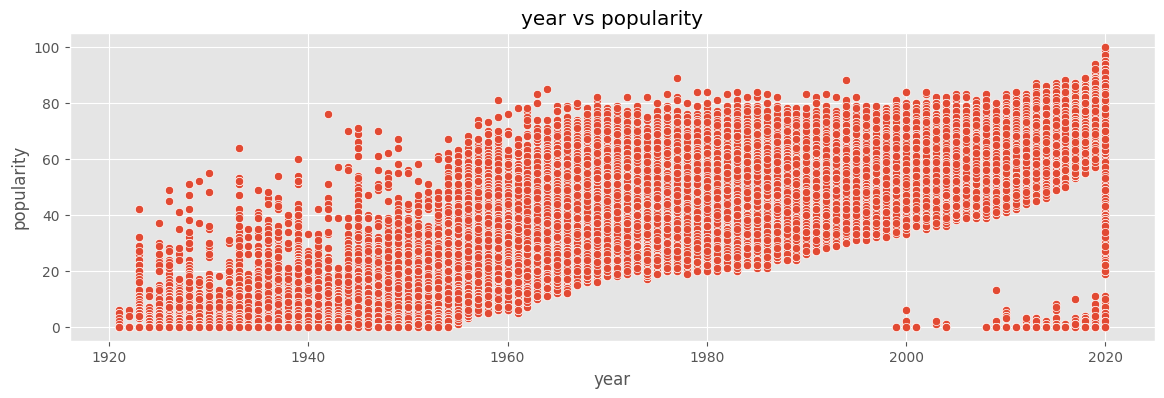

In [43]:
scatter(df, 'year', 'popularity', 'year vs popularity')

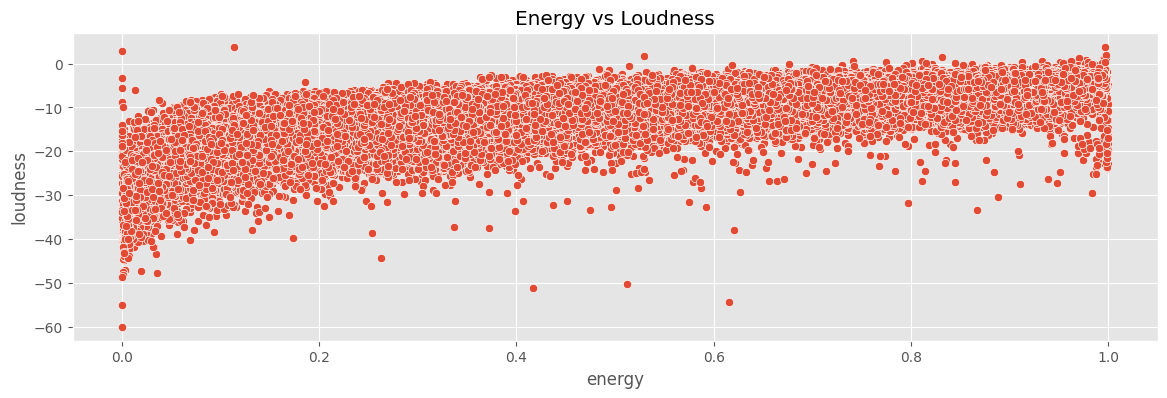

In [44]:
scatter(df, 'energy', 'loudness', 'Energy vs Loudness')

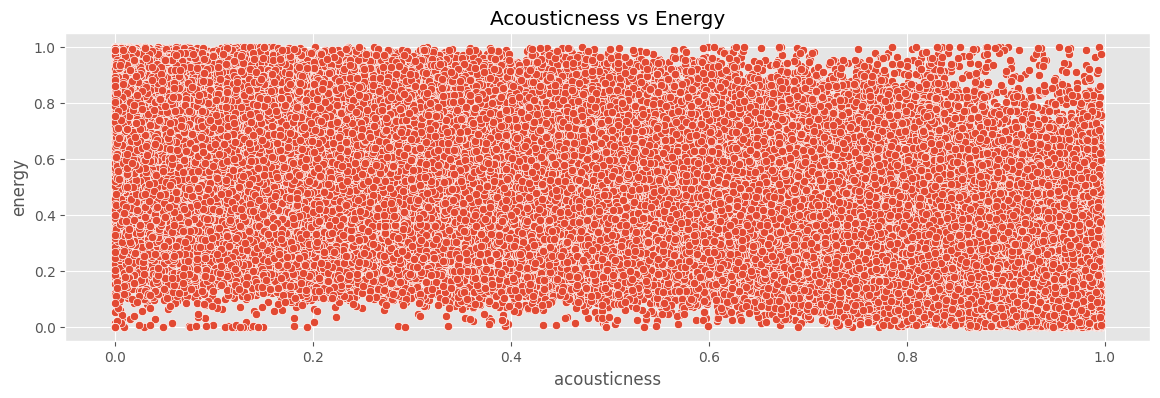

In [45]:
scatter(df,'acousticness','energy', 'Acousticness vs Energy')

In [46]:
df['popularity'].describe()

,popularity
count,155627.000000
mean,31.788064
std,22.138644
min,0.000000
25%,11.000000
50%,34.000000
75%,49.000000
max,100.000000


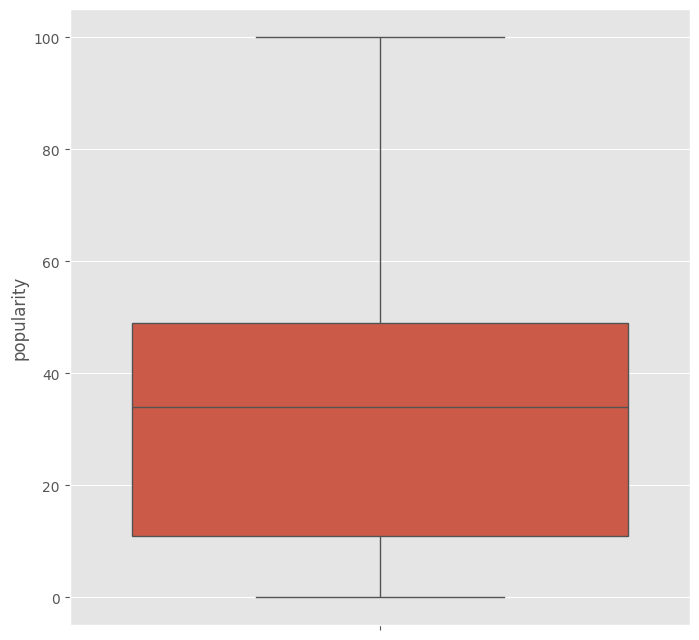

In [47]:
fig, axes = subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
boxplot(data=df,y="popularity",orient="v",ax=axes)
show()

/tmp/ipython-input-1368461040.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot(x=filtered_df['valence'], y=filtered_df['popularity'], palette="Set2")


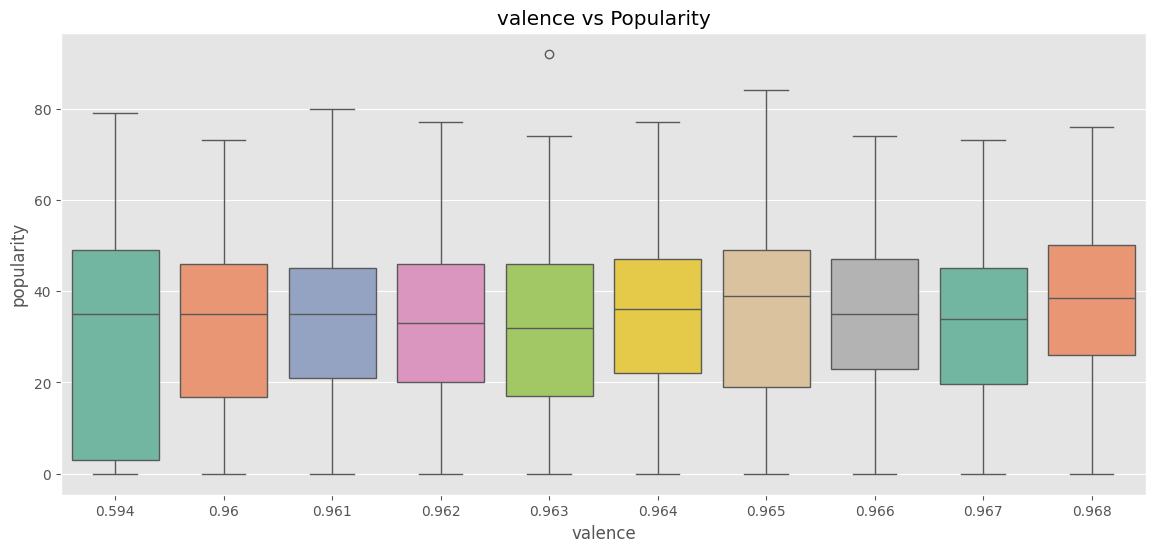

In [48]:
top_10_categs = df['valence'].value_counts().index[:10]
filtered_df = df[df['valence'].isin(top_10_categs)]

figure(figsize=(14, 6))

boxplot(x=filtered_df['valence'], y=filtered_df['popularity'], palette="Set2")

title(f'valence vs Popularity')
show()

/tmp/ipython-input-1796385074.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot(x=filtered_df['energy'], y=filtered_df['popularity'], palette="Set2")


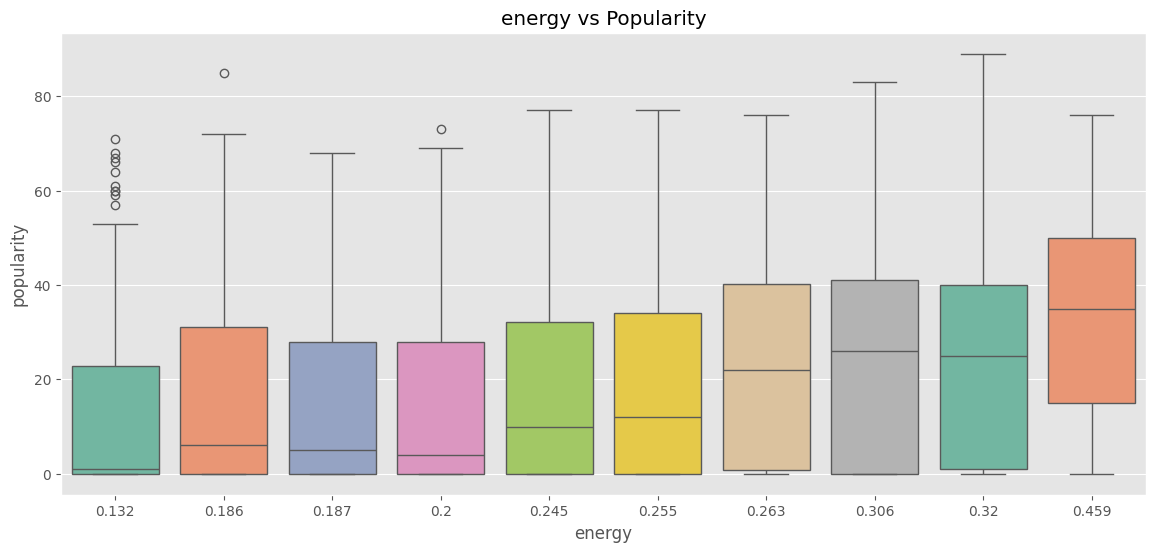

In [49]:
top_10_categs = df['energy'].value_counts().index[:10]
filtered_df = df[df['energy'].isin(top_10_categs)]

figure(figsize=(14, 6))

boxplot(x=filtered_df['energy'], y=filtered_df['popularity'], palette="Set2")

title(f'energy vs Popularity')
show()

/tmp/ipython-input-1630575935.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot(x=filtered_df['acousticness'], y=filtered_df['popularity'], palette="Set2")


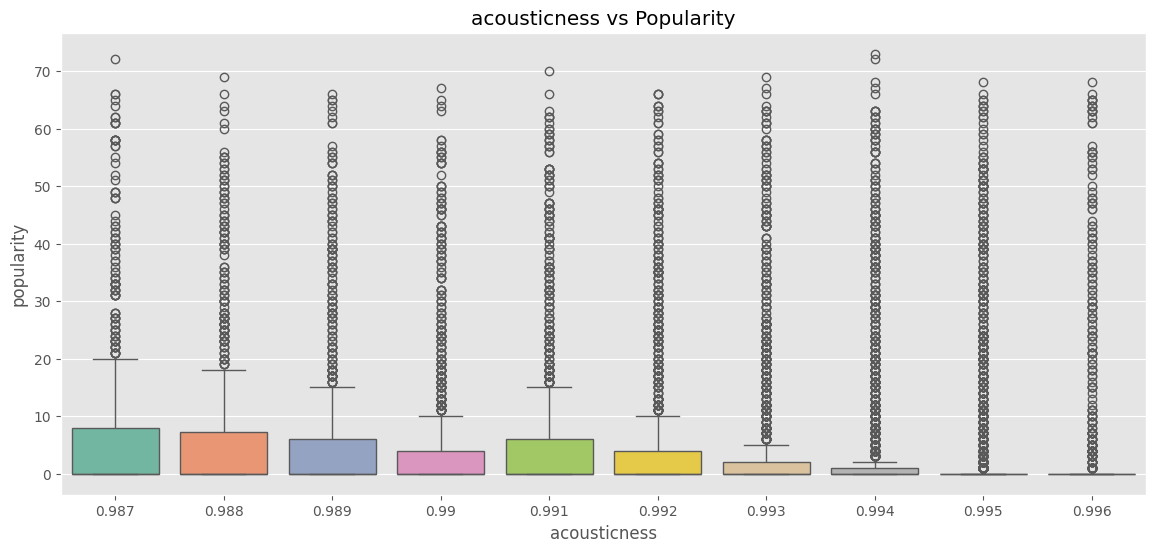

In [50]:
top_10_categs = df['acousticness'].value_counts().index[:10]
filtered_df = df[df['acousticness'].isin(top_10_categs)]

figure(figsize=(14, 6))

boxplot(x=filtered_df['acousticness'], y=filtered_df['popularity'], palette="Set2")

title(f'acousticness vs Popularity')
show()

In [52]:
df['duration_min'] = df['duration_ms'].apply(lambda x: x / 60000)

In [53]:
df['duration_min'].head()

,duration_min
0,13.861117
1,3.008883
2,8.334367
3,3.500000
4,2.778217


In [54]:
df[['duration_ms','duration_min']]

,duration_ms,duration_min
0,831667,13.861117
1,180533,3.008883
2,500062,8.334367
3,210000,3.500000
4,166693,2.778217
...,...,...
155623,288307,4.805117
155624,162633,2.710550
155625,295729,4.928817
155626,229080,3.818000


In [55]:
def GetTypeOfValence(valence) :
    valence = float(valence)

    if valence < 0.3 :
        return 'Sad song'
    elif valence < 0.6 :
        return 'Balance song between sadness and joy'
    else :
        return 'Happy song'


df['type_of_song_by_valence'] = df['valence'].apply( lambda x : GetTypeOfValence(x))

In [56]:
df['type_of_song_by_valence'].unique()

array(['Sad song', 'Happy song', 'Balance song between sadness and joy'],
      dtype=object)

In [57]:
df[['valence','type_of_song_by_valence']]

,valence,type_of_song_by_valence
0,0.0594,Sad song
1,0.9630,Happy song
2,0.0394,Sad song
3,0.1650,Sad song
4,0.2530,Sad song
...,...,...
155623,0.1870,Sad song
155624,0.9280,Happy song
155625,0.3810,Balance song between sadness and joy
155626,0.9540,Happy song


In [58]:
df['type_of_song_by_valence'].value_counts()

,count
type_of_song_by_valence,
Happy song,66508
Balance song between sadness and joy,53063
Sad song,36057


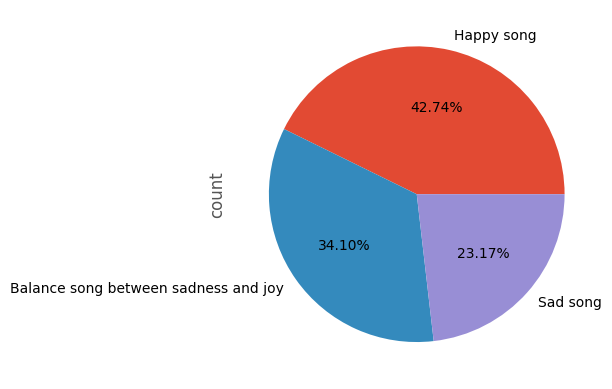

In [59]:
df['type_of_song_by_valence'].value_counts().plot.pie(autopct='%0.2f%%')
show()


In [60]:
def GetTypeOfAcousticness(acousticness) :
    acousticness = float(acousticness)
    if acousticness < 0.3 :
        return 'Highly electronic song'
    elif acousticness < 0.6 :
        return 'Mix of acoustic and electronic instruments'
    else :
        return 'Mostly acoustic song'


df['type_of_song_by_acousticness'] = df['acousticness'].apply(lambda x : GetTypeOfAcousticness(x))

In [61]:
df['type_of_song_by_acousticness'].unique()

array(['Mostly acoustic song',
       'Mix of acoustic and electronic instruments',
       'Highly electronic song'], dtype=object)

In [62]:
df['type_of_song_by_acousticness'].value_counts()

,count
type_of_song_by_acousticness,
Mostly acoustic song,71871
Highly electronic song,60369
Mix of acoustic and electronic instruments,23388


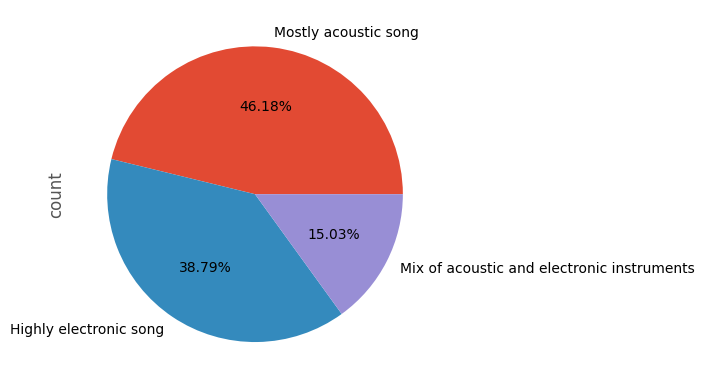

In [63]:
df['type_of_song_by_acousticness'].value_counts().plot.pie(autopct='%0.2f%%')
show()

In [64]:
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,loudness,mode,name,popularity,release_date,speechiness,tempo,duration_min,type_of_song_by_valence,type_of_song_by_acousticness
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,-20.096,1.0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4.0,1921,0.0366,80.954,13.861117,Sad song,Mostly acoustic song
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,-12.441,1.0,Clancy Lowered the Boom,5.0,1921,0.4150,60.936,3.008883,Happy song,Mostly acoustic song
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,-14.850,1.0,Gati Bali,5.0,1921,0.0339,110.339,8.334367,Sad song,Mostly acoustic song
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,-9.316,1.0,Danny Boy,3.0,1921,0.0354,100.109,3.500000,Sad song,Mostly acoustic song
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,-10.096,1.0,When Irish Eyes Are Smiling,2.0,1921,0.0380,101.665,2.778217,Sad song,Mostly acoustic song
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155623,0.1870,1930,0.924,['Andrea Wolper'],0.449,288307,0.214,0,7DhdmSnOql2WUtyibX0vPQ,0.000004,...,-10.382,0.0,Night Time Was My Mother,0.0,1930,0.0358,105.304,4.805117,Sad song,Mostly acoustic song
155624,0.9280,1930,0.923,['Raquel Meller'],0.624,162633,0.441,0,7DjhLJytwL6jpv899aIZSF,0.353000,...,-4.810,1.0,Tengo Miedo Torero,0.0,1/1/1930,0.0357,125.944,2.710550,Happy song,Mostly acoustic song
155625,0.3810,1930,0.122,['Cellular Project'],0.411,295729,0.660,0,7DmsrKo81sB9mE4wqcHKG1,0.416000,...,-6.923,0.0,Glow Reefer Glow,0.0,1930,0.0513,116.356,4.928817,Balance song between sadness and joy,Highly electronic song
155626,0.9540,1930,0.976,['Αλέξης Ζούμπας'],0.565,229080,0.532,0,7EVRpnW3NbtIxX1vGhKjtU,0.001580,...,-8.900,1.0,Θειακό συρτό Γιαννιώτικο,0.0,1/1/1930,0.0531,104.565,3.818000,Happy song,Mostly acoustic song


In [65]:
df.shape

(155628, 22)

In [66]:
df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo', 'duration_min', 'type_of_song_by_valence',
       'type_of_song_by_acousticness'],
      dtype='object')

/tmp/ipython-input-2013507383.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot(data=df,y="popularity",x="type_of_song_by_valence",orient="v",ax=axes, palette=['r','b','g'])


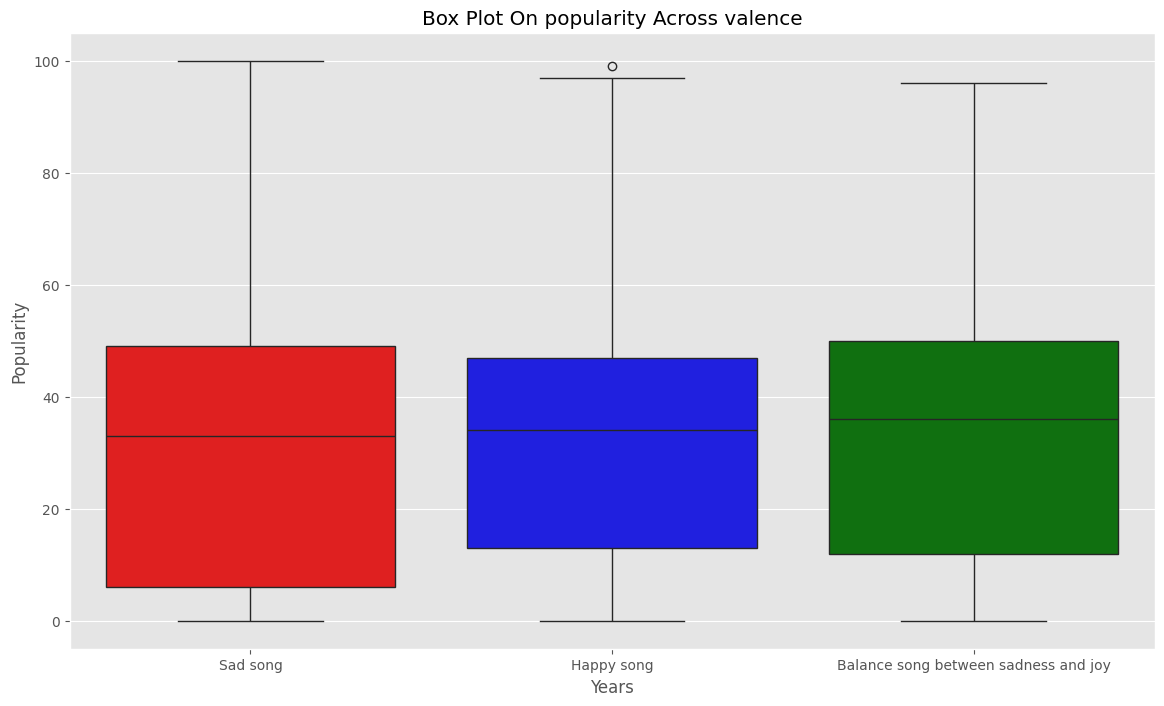

In [67]:
fig, axes = subplots(nrows=1,ncols=1)
fig.set_size_inches(14, 8)
boxplot(data=df,y="popularity",x="type_of_song_by_valence",orient="v",ax=axes, palette=['r','b','g'])
axes.set(xlabel='Years', ylabel='Popularity',title="Box Plot On popularity Across valence")
show()

In [74]:
Popul_GreaterEqual_95 = df.loc[(df["popularity"] >= 95) , (["name","artists","year","popularity","type_of_song_by_valence"])]
Popul_GreaterEqual_95

,name,artists,year,popularity,type_of_song_by_valence
19606,Mood (feat. iann dior),"['24kGoldn', 'iann dior']",2020,99.0,Happy song
19607,For The Night (feat. Lil Baby & DaBaby),"['Pop Smoke', 'Lil Baby', 'DaBaby']",2020,95.0,Balance song between sadness and joy
19608,WAP (feat. Megan Thee Stallion),"['Cardi B', 'Megan Thee Stallion']",2020,96.0,Balance song between sadness and joy
19610,positions,['Ariana Grande'],2020,96.0,Happy song
19611,Dakiti,"['Bad Bunny', 'Jhay Cortez']",2020,100.0,Sad song
19612,What You Know Bout Love,['Pop Smoke'],2020,96.0,Balance song between sadness and joy
19615,Holy (feat. Chance The Rapper),"['Justin Bieber', 'Chance the Rapper']",2020,95.0,Balance song between sadness and joy
19616,Blinding Lights,['The Weeknd'],2020,96.0,Balance song between sadness and joy
19618,Dynamite,['BTS'],2020,97.0,Happy song
19620,Lonely (with benny blanco),"['Justin Bieber', 'benny blanco']",2020,95.0,Sad song


In [75]:
Popul_GreaterEqual_95['type_of_song_by_valence'].value_counts()

,count
type_of_song_by_valence,
Balance song between sadness and joy,5
Happy song,3
Sad song,3


In [76]:
Popul_GreaterEqual_95.loc[(Popul_GreaterEqual_95['type_of_song_by_valence'] == 'Balance song between sadness and joy'), (['name', 'artists','popularity','year'])]

,name,artists,popularity,year
19607,For The Night (feat. Lil Baby & DaBaby),"['Pop Smoke', 'Lil Baby', 'DaBaby']",95.0,2020
19608,WAP (feat. Megan Thee Stallion),"['Cardi B', 'Megan Thee Stallion']",96.0,2020
19612,What You Know Bout Love,['Pop Smoke'],96.0,2020
19615,Holy (feat. Chance The Rapper),"['Justin Bieber', 'Chance the Rapper']",95.0,2020
19616,Blinding Lights,['The Weeknd'],96.0,2020


In [77]:
Popul_GreaterEqual_95.loc[(Popul_GreaterEqual_95['type_of_song_by_valence'] == 'Happy song'), (['name', 'artists','popularity','year'])]

,name,artists,popularity,year
19606,Mood (feat. iann dior),"['24kGoldn', 'iann dior']",99.0,2020
19610,positions,['Ariana Grande'],96.0,2020
19618,Dynamite,['BTS'],97.0,2020


In [78]:
Popul_GreaterEqual_95.loc[(Popul_GreaterEqual_95['type_of_song_by_valence'] == 'Sad song'), (['name', 'artists','popularity','year'])]

,name,artists,popularity,year
19611,Dakiti,"['Bad Bunny', 'Jhay Cortez']",100.0,2020
19620,Lonely (with benny blanco),"['Justin Bieber', 'benny blanco']",95.0,2020
19623,you broke me first,['Tate McRae'],95.0,2020


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155628 entries, 0 to 155627
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   valence                       155628 non-null  float64
 1   year                          155628 non-null  int64  
 2   acousticness                  155628 non-null  float64
 3   artists                       155628 non-null  object 
 4   danceability                  155628 non-null  float64
 5   duration_ms                   155628 non-null  int64  
 6   energy                        155628 non-null  float64
 7   explicit                      155628 non-null  int64  
 8   id                            155628 non-null  object 
 9   instrumentalness              155627 non-null  float64
 10  key                           155627 non-null  float64
 11  liveness                      155627 non-null  float64
 12  loudness                      155627 non-nul

In [81]:
df_object = df.select_dtypes('object')
df_non_object = df.select_dtypes('number')

In [82]:
df_object.head()

,artists,id,name,release_date,type_of_song_by_valence,type_of_song_by_acousticness
0,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",1921,Sad song,Mostly acoustic song
1,['Dennis Day'],7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,1921,Happy song,Mostly acoustic song
2,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1o6I8BglA6ylDMrIELygv1,Gati Bali,1921,Sad song,Mostly acoustic song
3,['Frank Parker'],3ftBPsC5vPBKxYSee08FDH,Danny Boy,1921,Sad song,Mostly acoustic song
4,['Phil Regan'],4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,1921,Sad song,Mostly acoustic song


In [84]:
df_object['type_of_song_by_valence'].value_counts()

,count
type_of_song_by_valence,
Happy song,66508
Balance song between sadness and joy,53063
Sad song,36057


In [85]:
labels = {'Happy song':1, 'Balance song between sadness and joy':2, 'Sad song':3}
df_object['type_of_song_by_valence'] = df_object['type_of_song_by_valence'].map(labels)

In [86]:
df_object['type_of_song_by_valence'].value_counts()

,count
type_of_song_by_valence,
1,66508
2,53063
3,36057


In [87]:
df_object['type_of_song_by_acousticness'].value_counts()

,count
type_of_song_by_acousticness,
Mostly acoustic song,71871
Highly electronic song,60369
Mix of acoustic and electronic instruments,23388


In [88]:
labels2 = {'Mostly acoustic song':1, 'Mix of acoustic and electronic instruments':2, 'Highly electronic song':3}
df_object['type_of_song_by_acousticness'] = df_object['type_of_song_by_acousticness'].map(labels2)

In [89]:
df_object['type_of_song_by_acousticness'].value_counts()

,count
type_of_song_by_acousticness,
1,71871
3,60369
2,23388


In [94]:
data = concat([df_non_object,df_object], axis=1)

In [109]:
x=data.drop('popularity',axis=1)
y=data['popularity']

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=1234)

In [96]:
print(f'shape of x_train : {x_train.shape}')
print(f'shape of x_test : {x_test.shape}')
print('-------------------------------')
print(f'shape of y_train : {y_train.shape}')
print(f'shape of y_test : {y_test.shape}')

shape of x_train : (124502, 21)
shape of x_test : (31126, 21)
-------------------------------
shape of y_train : (124502,)
shape of y_test : (31126,)


In [97]:
r_2=[]
rmse=[]
mae=[]

def Regression_func(model):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    R2 = r2_score(y_test, pred)
    RMSE = sqrt(mean_squared_error(y_test, pred))
    MAE = mean_absolute_error(y_test, pred)

    r_2.append(R2)
    rmse.append(RMSE)
    mae.append(MAE)

In [98]:
GradientBoostingRegressor_model = GradientBoostingRegressor()
XGBRegressor_model	= XGBRegressor()
DecisionTreeRegressor_model	= DecisionTreeRegressor()

In [106]:
Algorithms	=	['GradientBoostingRegressor', 'XGBRegressor','DecisionTreeRegressor']

Successfully ran in 9.3s